<a href="https://colab.research.google.com/github/imadegunawinangun/rock-paper-scissors/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NAME : I MADE GUNA WINANGUN
#email : rumahgugun@gmail.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import zipfile
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



In [ ]:
if not os.path.exists('/tmp/rockpaperscissors/'):
  !wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

In [ ]:


local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
if not os.path.exists(base_dir+'total'): os.rename(base_dir+'rps-cv-images',base_dir+'total')
total_dir = base_dir+'total'


In [ ]:
import ntpath

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail


In [ ]:
def load_image(datadir):
  image_path = []
  label = []
  path_temp = path_leaf(datadir)
  for i in range(len(os.listdir(datadir))):
    image_path.append(os.path.join(datadir, os.listdir(datadir)[i].strip()))
    label.append(path_temp)
    
  image_paths = np.asarray(image_path)
  labels = np.asarray(label)
  return image_paths, labels

In [ ]:
paper_data, paper_labels = load_image(paper_dir)
rock_data, rock_labels = load_image(rock_dir)
scissors_data, scissors_labels = load_image(scissors_dir)

In [ ]:
#JALANKAN UNTUK MENGHAPUS FOLDER TRAINING DAN VALIDATION
#shutil.rmtree(base_dir+'training')
#shutil.rmtree(base_dir+'validation')

In [ ]:
if not os.path.exists(base_dir+'training'): os.makedirs(base_dir+'training')
if not os.path.exists(base_dir+'training/paper'): os.makedirs(base_dir+'training/paper')
if not os.path.exists(base_dir+'training/rock'): os.makedirs(base_dir+'training/rock')
if not os.path.exists(base_dir+'training/scissors'): os.makedirs(base_dir+'training/scissors')

if not os.path.exists(base_dir+'validation'):  os.makedirs(base_dir+'validation')
if not os.path.exists(base_dir+'validation/paper'): os.makedirs(base_dir+'validation/paper')
if not os.path.exists(base_dir+'validation/rock'): os.makedirs(base_dir+'validation/rock')
if not os.path.exists(base_dir+'validation/scissors'): os.makedirs(base_dir+'validation/scissors')

In [ ]:
from sklearn.model_selection import train_test_split

paper_train, paper_valid = train_test_split(paper_data, train_size = 0.6, random_state = 1)
print('Paper Training Samples: {}\nValid Samples: {}'.format(len(paper_train), len(paper_valid)))
for i in range(len(paper_train)):
  if not os.path.exists(base_dir+'training/paper/'+path_leaf(paper_train[i])):
    shutil.copyfile(paper_train[i], base_dir+'training/paper/'+path_leaf(paper_train[i]))
for i in range(len(paper_valid)):
  if not os.path.exists(base_dir+'validation/paper/'+path_leaf(paper_valid[i])):
    shutil.copyfile(paper_valid[i], base_dir+'validation/paper/'+path_leaf(paper_valid[i]))

rock_train, rock_valid = train_test_split(rock_data, train_size = 0.602, random_state = 1)
print('Rock Training Samples: {}\nValid Samples: {}'.format(len(rock_train), len(rock_valid)))
for i in range(len(rock_train)):
  shutil.copyfile(rock_train[i], base_dir+'training/rock/'+path_leaf(rock_train[i]))
for i in range(len(rock_valid)):
  shutil.copyfile(rock_valid[i], base_dir+'validation/rock/'+path_leaf(rock_valid[i]))

scissors_train, scissors_valid = train_test_split(scissors_data, train_size = 0.6, random_state = 1)
print('Scissors Training Samples: {}\nValid Samples: {}'.format(len(scissors_train), len(scissors_valid)))
for i in range(len(scissors_train)):
  shutil.copyfile(scissors_train[i], base_dir+'training/scissors/'+path_leaf(scissors_train[i]))
for i in range(len(scissors_valid)):
  shutil.copyfile(scissors_valid[i], base_dir+'validation/scissors/'+path_leaf(scissors_valid[i]))

print('total training samples: {}'.format(len(rock_train)+len(paper_train)+len(scissors_train)))
print('total validation samples: {}'.format(len(rock_valid)+len(paper_valid)+len(scissors_valid)))

Paper Training Samples: 427
Valid Samples: 285
Rock Training Samples: 437
Valid Samples: 289
Scissors Training Samples: 450
Valid Samples: 300
total training samples: 1314
total validation samples: 874


In [ ]:
total_augmented_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.1,
    brightness_range = (0.5,1.2),
)

total_augmented_images = total_augmented_generator.flow_from_directory(
    total_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=1,
)
total_normal_generator = ImageDataGenerator(
    rescale=1./255,
)
total_normal_images = total_normal_generator.flow_from_directory(
    total_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=1,
)
print("block ini untuk generate gambar di block selanjutnya\nsplit Data ada di atas block ini")

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.
block ini untuk generate gambar di block selanjutnya
split Data ada di atas block ini


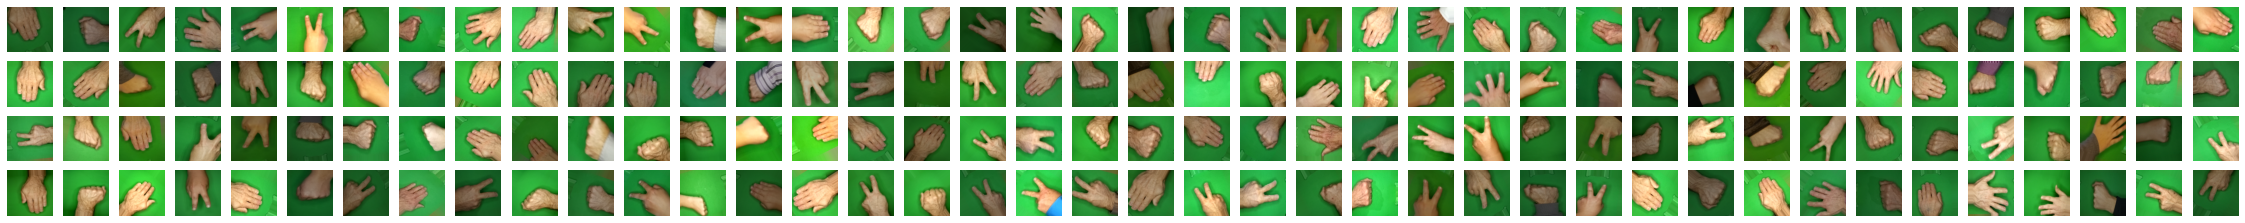

In [ ]:
plt.figure(figsize=(40, 40))

for i in range(160):
    plt.subplot(40, 40, i + 1)
    img = total_augmented_images.next()[0][0]
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.1,
    brightness_range = (0.5,1.2),
)

valid_generator = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
train_images = train_generator.flow_from_directory(
    base_dir+'training',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=10
)

val_images = valid_generator.flow_from_directory(
    base_dir+'validation',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=10,
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=24,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)
print(model.summary())


Epoch 1/24
42/42 [==============================] - 71s 2s/step - loss: 0.9127 - accuracy: 0.5776 - val_loss: 0.6167 - val_accuracy: 0.8192
Epoch 2/24
42/42 [==============================] - 71s 2s/step - loss: 0.6196 - accuracy: 0.7686 - val_loss: 0.3805 - val_accuracy: 0.8753
Epoch 3/24
42/42 [==============================] - 71s 2s/step - loss: 0.4792 - accuracy: 0.8326 - val_loss: 0.3480 - val_accuracy: 0.8959
Epoch 4/24
42/42 [==============================] - 71s 2s/step - loss: 0.3287 - accuracy: 0.8935 - val_loss: 0.2860 - val_accuracy: 0.9062
Epoch 5/24
42/42 [==============================] - 71s 2s/step - loss: 0.2281 - accuracy: 0.9193 - val_loss: 0.2103 - val_accuracy: 0.9325
Epoch 6/24
42/42 [==============================] - 71s 2s/step - loss: 0.1796 - accuracy: 0.9414 - val_loss: 0.1366 - val_accuracy: 0.9519
Epoch 7/24
42/42 [==============================] - 70s 2s/step - loss: 0.1755 - accuracy: 0.9361 - val_loss: 0.2205 - val_accuracy: 0.9314
Epoch 8/24
42/42 [==

Text(0.5, 0, 'Epoch')

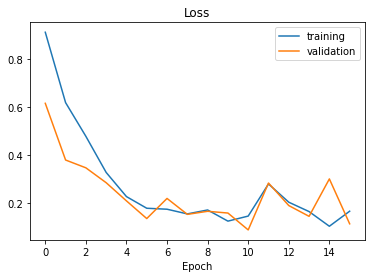

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
acc = model.evaluate(val_images, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 96.57%


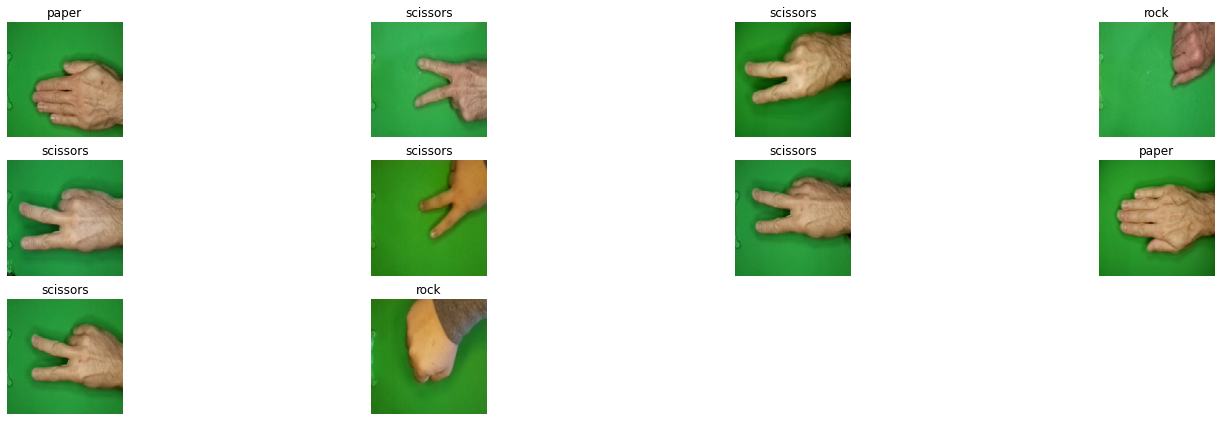

In [ ]:
plt.figure(figsize=(25, 25))

for i in range(10):
  plt.subplot(10, 4, i + 1)
  img = total_normal_images.next()
  predictions = np.argmax(model.predict(img[0]), axis=1)
  plt.imshow(img[0][0])
  plt.axis('off')
  if (predictions==0):
    plt.title('paper')
  elif (predictions==1):
    plt.title('rock')
  else:
    plt.title('scissors')
plt.show()


Saving p (1).png to p (1) (2).png
Saving p (2).png to p (2) (1).png
Saving p (3).png to p (3) (2).png
Saving p (4).png to p (4) (1).png
Saving p (5).png to p (5) (1).png
Saving p (6).png to p (6) (1).png
Saving r (2).png to r (2) (1).png
Saving r (3).png to r (3) (1).png
Saving r (4).png to r (4) (1).png
Saving r (5).png to r (5) (1).png
Saving r (6).png to r (6) (1).png
Saving r.png to r (1).png
Saving s (1).png to s (1) (1).png
Saving s (2).png to s (2) (1).png
Saving s (3).png to s (3) (1).png
Saving s (4).png to s (4) (1).png
Saving s (5).png to s (5) (1).png
Saving s (6).png to s (6) (1).png
p (1).png
[0]
paper
p (2).png
[0]
paper
p (3).png
[0]
paper
p (4).png
[0]
paper
p (5).png
[0]
paper
p (6).png
[0]
paper
r (2).png
[1]
rock
r (3).png
[0]
paper
r (4).png
[2]
scissors
r (5).png
[1]
rock
r (6).png
[1]
rock
r.png
[1]
rock
s (1).png
[2]
scissors
s (2).png
[2]
scissors
s (3).png
[2]
scissors
s (4).png
[2]
scissors
s (5).png
[2]
scissors
s (6).png
[2]
scissors


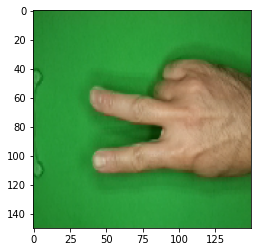

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = np.argmax(model.predict(images), axis=1)
  print(fn)
  print(classes)
  if (classes==0):
    print('paper')
  elif (classes==1):
    print('rock')
  else:
    print('scissors')

In [ ]:
#NAME : I MADE GUNA WINANGUN
#email : rumahgugun@gmail.com